# Visualizing Convolution in 1D
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/convolution_1d_example.ipynb)

The concept of convolution is an important one and found in many applications. A basic example of convolution is taking a running-mean. The act of computing this running mean is _convolving_ a rectangular window with your data.

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS
#.............................................
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
MS = 10

### Make a time series to play with

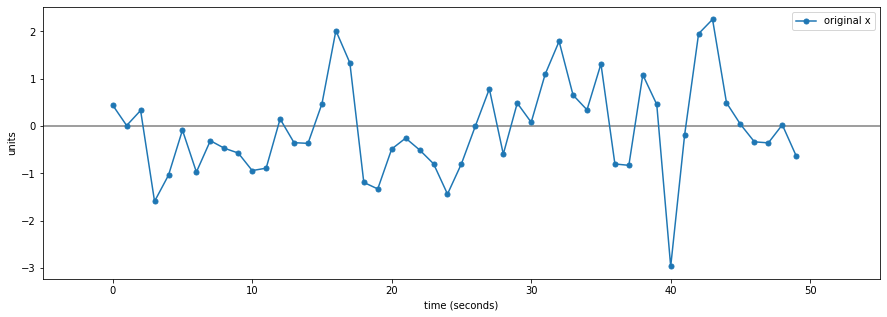

In [2]:
N = 50          # length of window
alpha = 0.5     # red noise lag-one autocorrelation


x = np.zeros(N,)
factor = np.sqrt(1.-alpha*alpha)
x[0] = x[-1]*alpha + factor*np.random.randn()
for j in np.arange(1,N,1):
    x[j] = x[j-1]*alpha + factor*np.random.randn()+0.5*np.cos(2.*np.pi*(1.-0.01*np.random.randn())*50./256.*j)
    
plt.figure(figsize=(15,5))
plt.axhline(y=0,color='gray')
plt.plot(x, '.-', linewidth = 1.5, markersize = 10, label = 'original x')
plt.legend()
plt.xlabel('time (seconds)')
plt.ylabel('units')
plt.xlim(-N*0.1,N*1.1)
plt.show()

### Compute the convolution

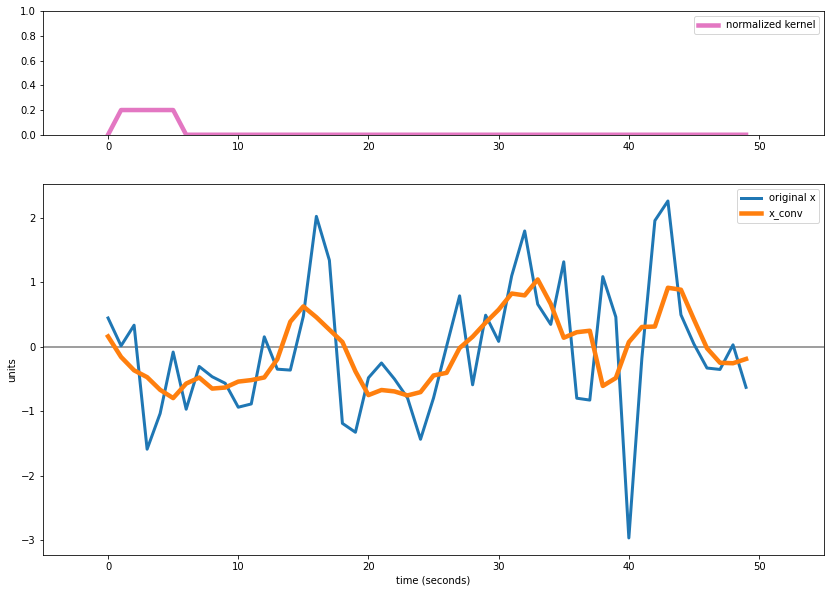

In [3]:
kernel = [1,1,1,1,1]                         # change these values and the length of this array
                                             # values can be integers, or not, positive or negative,
                                             # mess around!

x_conv = np.convolve(x,
                     kernel/np.sum(np.abs(kernel)),
#                      mode='full',          # experiment with the "mode" options
                     mode='same',
#                      mode='valid',
                    )

#----------------
# plot the results
from matplotlib import gridspec
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[1, 3])

LW = 3
fig=plt.figure(figsize=(14,10))

ax0 = fig.add_subplot(spec[0])
kernel_plot = np.zeros(np.shape(x))
kernel_plot[1:len(kernel)+1] = kernel/np.sum(np.abs(kernel))
plt.plot(kernel_plot,label='normalized kernel', color='tab:pink', linewidth=LW*1.5)
plt.xlim(-N*0.1,N*1.1)
plt.ylim(0,1)
plt.legend()

ax1 = fig.add_subplot(spec[1])
plt.axhline(y=0,color='gray')
plt.plot(x, label='original x',linewidth=LW)
plt.plot(x_conv, label='x_conv',linewidth=LW*1.5)
plt.legend()
plt.xlabel('time (seconds)')
plt.ylabel('units')
plt.xlim(-N*0.1,N*1.1)
plt.show()